Using Regression Methods to Model Institutional Impact on Undergraduate Computer Science Gender Parity: Data Cleaning 


Sophie Goldman

SML 312

December 2022

## Load Separate Files by IPEDS Category

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
main_folder = "/content/drive/Othercomputers/Dell/IPEDS All Data" # if running independently, should be updated to the folder containing all project data

### Process all files related to institution enrollments

In [3]:
enrollment_df = pd.DataFrame()

for year in range(2001, 2021):
  print(year)
  # find file name
  year_folder = main_folder + "/" + str(year)
  faculty_folder = year_folder + "/" + "Enrollment"
  path = faculty_folder + "/" + str(year) + "_Enrollment.csv"
  df = pd.read_csv(path)
  # update column names
  new_names = []
  for col in df:
    split_col = col.split(".")
    if len(split_col) > 1:
      col = "Enrollment_" + split_col[1]
    else:
      col = split_col[0]
    new_names.append(col)
  df.columns = new_names

  # update columns related to race/ethnicity to use all values based on the "new" race/ethnicity definitions (if derived/old values are also available)
  # if only values based on the old race/ethnicity definitions, use those values
  dropped  =[]
  for col in df.columns:
    if "new" in col:
      if "Black or African American total" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Black or African American/Black non-Hispanic total - derived']
      if "Black or African American men" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Black or African American/Black non-Hispanic men - derived']
      if "Black or African American women" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Black or African American/Black non-Hispanic women - derived']
      if "Hispanic total" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Hispanic or Latino/Hispanic  total - derived']
      if "Hispanic men" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Hispanic or Latino/Hispanic  men - derived']
      if "Hispanic women" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Hispanic or Latino/Hispanic  women - derived']
      if "White total" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_White/White non-Hispanic total - derived']
      if "White men" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_White/White non-Hispanic men - derived']
      if "White women" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_White/White non-Hispanic women - derived']
      if "Asian total" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Asian/Native Hawaiian/Other Pacific Islander total - derived']
      if "Asian men" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Asian/Native Hawaiian/Other Pacific Islander men - derived']
      if "Asian women" in col:
        df.loc[df[col].isna(), col] = df['Enrollment_Asian/Native Hawaiian/Other Pacific Islander women - derived'] 
    if "Indian" in col or "Two" in col or "alien" in col or "unknown" in col or "Hawaiian" in col:
      dropped.append(col)
    if "old" in col or "derived" in col:
      dropped.append(col)
  df = df.drop(columns=dropped)
  print(df.columns)

  # rename columns
  new_names= []
  for col in df:
    if "White, non-Hispanic total" in col or "White non-Hispanic total" in col or "White,  non-Hispanic total" in col:
       col = "Enrollment_White total"
    if "White, non-Hispanic men" in col or "White non-Hispanic men" in col:
       col = "Enrollment_White men"
    if "White, non-Hispanic women" in col or "White non-Hispanic women" in col:
      col = "Enrollment_White women"
    if "Black, non-Hispanic total" in col or "Black non-Hispanic total" in col or "Black non-Hispanic  total" in col or "Black, non-Hispanic  total" in col:
      col = "Enrollment_Black or African American total"
    if "Black, non-Hispanic men" in col or "Black non-Hispanic men" in col:
      col = "Enrollment_Black or African American men"
    if "Black, non-Hispanic women" in col or "Black non-Hispanic women" in col:
      col = "Enrollment_Black or African American women"
    if "Asian or Pacific Islander" in col:
      if "women" in col:
        col = "Enrollment_Asian women"
      elif " men" in col: 
        col = "Enrollment_Asian men"
      elif "total" in col:
        col = "Enrollment_Asian total"
    if "Total men" in col:
      col = "Enrollment_Grand total men"
    if "Total women" in col:
      col = "Enrollment_Grand total women"
    if "Hispanic" in col and "Black" not in col and "White" not in col:
      if "women" in col:
        col = "Enrollment_Hispanic or Latino women"
      elif " men" in col:
        col = "Enrollment_Hispanic or Latino men"
      elif "total" in col:
        col = "Enrollment_Hispanic or Latino total"
    splitter = col.split(" - new")
    new_names.append(splitter[0])

  
  df.columns=new_names
  enrollment_df = enrollment_df.append(df)

2001
Index(['unitid', 'institution name', 'year', 'Enrollment_Level of student',
       'Enrollment_Grand total', 'Enrollment_Grand total men',
       'Enrollment_Grand total women', 'Enrollment_White non-Hispanic total',
       'Enrollment_White, non-Hispanic men',
       'Enrollment_White, non-Hispanic women',
       'Enrollment_Black non-Hispanic  total',
       'Enrollment_Black, non-Hispanic men',
       'Enrollment_Black, non-Hispanic women', 'Enrollment_Hispanic total',
       'Enrollment_Hispanic men', 'Enrollment_Hispanic women',
       'Enrollment_Asian or Pacific Islander total',
       'Enrollment_Asian or Pacific Islander men',
       'Enrollment_Asian or Pacific Islander women', 'IDX_EF'],
      dtype='object')
2002
Index(['unitid', 'institution name', 'year', 'Enrollment_Level of student',
       'Enrollment_Grand total', 'Enrollment_Total men',
       'Enrollment_Total women', 'Enrollment_White non-Hispanic total',
       'Enrollment_White non-Hispanic men',
       'Enr

In [4]:
# Replace spaces with underscores
new_names = []
for col in enrollment_df.columns:
  col = col.replace(" ", "_")
  new_names.append(col)
enrollment_df.columns = new_names

enrollment_df[['unitid', 'institution_name', 'year']] = enrollment_df[['unitid', 'institution_name', 'year']].astype(str)

In [5]:
# filter to only include undergraduate enrollments, not institution-wide enrollments
enrollment_df = enrollment_df[enrollment_df['Enrollment_Level_of_student'] == "All students, Undergraduate total"]

### Process all files related to institution financial data

In [6]:
financial_df = pd.DataFrame()

for year in range(2009, 2021):
  # find file name, load data
  year_folder = main_folder + "/" + str(year)
  financial_folder = year_folder + "/" + "Financial"
  path = financial_folder + "/" + str(year) + "_Financial.csv"
  df = pd.read_csv(path)
  # rename columns
  new_names = []
  for col in df.columns:
    col = col.split('.')
    if len(col) > 1:
      col = col[1]
    else: col = col[0]
    new_names.append(col)
  df.columns = new_names
  new_names = []
  for col in df.columns:
    if "Pell" in col:
      col = "Percent of undergraduate students awarded Pell grants"
    if "federal" in col:
      col = "Percent of undergraduate students awarded federal, state, local, institutional or other sources of grant aid"
    new_names.append(col)
  df.columns = new_names
  for col in df.columns:
    if "FTE" in col:
      if "FASB" in col:
        df.loc[df[col].isna(), col] = df['Endowment assets (year end) per FTE enrollment (GASB)']
      if "GASB" in col:
        df.loc[df[col].isna(), col] = df['Endowment assets (year end) per FTE enrollment (FASB)']
  financial_df = financial_df.append(df)


In [7]:
financial_df = financial_df.rename({'Endowment assets (year end) per FTE enrollment (FASB)': 'Endowment assets (year end) per FTE enrollment'}, axis=1)

In [8]:
financial_df = financial_df.drop("Endowment assets (year end) per FTE enrollment (GASB)", axis=1)

In [9]:
financial_df = financial_df[~financial_df["Endowment assets (year end) per FTE enrollment"].isna()]

Note that the financial data is only available from 2009-2020.

In [10]:
financial_df

,unitid,institution name,year,Endowment assets (year end) per FTE enrollment,"Percent of undergraduate students awarded federal, state, local, institutional or other sources of grant aid",Percent of undergraduate students awarded Pell grants
1,100663,University of Alabama at Birmingham,2009,21737.0,53.0,25.0
2,100690,Amridge University,2009,301.0,100.0,47.0
3,100706,University of Alabama in Huntsville,2009,8886.0,49.0,23.0
4,100724,Alabama State University,2009,10339.0,86.0,70.0
5,100751,The University of Alabama,2009,20122.0,44.0,17.0
...,...,...,...,...,...,...
2330,492607,Chicago School of Professional Psychology at D...,2019,18968.0,NaN,NaN
2331,492689,Texas Tech University Health Sciences Center-E...,2019,149970.0,74.0,37.0
2332,492801,Drury University-College of Continuing Profess...,2019,416.0,81.0,62.0
2333,492962,Indiana Institute of Technology-College of Pro...,2019,31878.0,74.0,63.0


### Process all files related to institution faculty

In [11]:
faculty_df = pd.DataFrame()

for year in range(2001, 2021):
  # find file name, load data
  year_folder = main_folder + "/" + str(year)
  faculty_folder = year_folder + "/" + "Faculty"
  path = faculty_folder + "/" + str(year) + "_Faculty.csv"
  df = pd.read_csv(path)
  # rename columns
  new_names = []
  for col in df:
    split_col = col.split(".")
    if len(split_col) > 1:
      col = "Faculty_" + split_col[1]
    else:
      col = split_col[0]
    new_names.append(col)
  df.columns = new_names

  # update columns related to race/ethnicity to use all values based on the "new" race/ethnicity definitions (if derived/old values are also available)
  # if only values based on the old race/ethnicity definitions, use those values
  dropped  =[]
  for col in df.columns:
    if "new" in col:
      if "Black or African American total" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Black or African American/Black non-Hispanic total - derived']
      if "Black or African American men" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Black or African American/Black non-Hispanic men - derived']
      if "Black or African American women" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Black or African American/Black non-Hispanic women - derived']
      if "Hispanic or Latino total" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Hispanic or Latino/Hispanic total - derived']
      if "Hispanic or Latino men" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Hispanic or Latino/Hispanic men - derived']
      if "Hispanic or Latino women" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Hispanic or Latino/Hispanic women - derived']
      if "White total" in col:
        df.loc[df[col].isna(), col] = df['Faculty_White/White non-Hispanic total - derived']
      if "White men" in col:
        df.loc[df[col].isna(), col] = df['Faculty_White/White non-Hispanic men - derived']
      if "White women" in col:
        df.loc[df[col].isna(), col] = df['Faculty_White/White non-Hispanic women - derived']
      if "Asian total" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Asian/Native Hawaiian/Other Pacific Islander total - derived']
      if "Asian men" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Asian/Native Hawaiian/Other Pacific Islander men - derived']
      if "Asian women" in col:
        df.loc[df[col].isna(), col] = df['Faculty_Asian/Native Hawaiian/Other Pacific Islander women - derived'] 
    if "Indian" in col or "Two" in col or "alien" in col or "unknown" in col or "Hawaiian" in col:
      dropped.append(col)
    if "old" in col or "derived" in col:
      dropped.append(col)
  df = df.drop(columns=dropped)

  # rename columns
  new_names= []
  for col in df:
    if "Tenure" in col or "staff" in col:
      col = "Faculty_Tenure_Status"
    if "White, non-Hispanic total" in col or "White non-Hispanic total" in col or "White,  non-Hispanic total" in col:
      col = "Faculty_White total"
    if "White, non-Hispanic men" in col or "White non-Hispanic men" in col:
      col = "Faculty_White men"
    if "White, non-Hispanic women" in col or "White non-Hispanic women" in col:
      col = "Faculty_White women"
    if "Black, non-Hispanic total" in col or "Black non-Hispanic total" in col or "Black non-Hispanic  total" in col or "Black, non-Hispanic  total" in col:
      col = "Faculty_Black or African American total"
    if "Black, non-Hispanic men" in col or "Black non-Hispanic men" in col:
      col = "Faculty_Black or African American men"
    if "Black, non-Hispanic women" in col or "Black non-Hispanic women" in col:
      col = "Faculty_Black or African American women"
    if "Total men" in col:
      col = "Faculty_Grand total men"
    if "Total women" in col:
      col = "Faculty_Grand total women"
    if "Hispanic" in col and "Black" not in col and "White" not in col:
      if "women" in col:
        col = "Faculty_Hispanic or Latino women"
      elif "men" in col:
        col = "Faculty_Hispanic or Latino men"
      elif "total" in col:
        col = "Faculty_Hispanic or Latino total"
    if "Asian or" in col:
      if "women" in col:
        col = "Faculty_Asian women"
      elif "men" in col:
        col = "Faculty_Asian men"
      elif "total" in col:
        col = "Faculty_Asian total"
    splitter = col.split(" - new")
    new_names.append(splitter[0])
  df.columns=new_names
  faculty_df = faculty_df.append(df)

In [12]:

faculty_df

,unitid,institution name,year,Faculty_Tenure_Status,Faculty_Grand total,Faculty_Grand total men,Faculty_Grand total women,Faculty_White total,Faculty_White men,Faculty_White women,...,Faculty_Black or African American men,Faculty_Black or African American women,Faculty_Hispanic or Latino total,Faculty_Hispanic or Latino men,Faculty_Hispanic or Latino women,Faculty_Asian total,Faculty_Asian men,Faculty_Asian women,IDX_S,IDX_HR
0,100654,Alabama A & M University,2001,"Total full-time faculty, Tenured total",119,88,31,31.0,21.0,10.0,...,41.0,17.0,0.0,0.0,0.0,16.0,12.0,4.0,-2.0,NaN
1,100654,Alabama A & M University,2001,"Total full-time faculty, Non-tenured on tenure...",26,15,11,7.0,3.0,4.0,...,8.0,6.0,0.0,0.0,0.0,4.0,3.0,1.0,-2.0,NaN
2,100654,Alabama A & M University,2001,"Total full-time faculty, Non-tenured not on te...",149,97,52,42.0,27.0,15.0,...,45.0,31.0,0.0,0.0,0.0,22.0,17.0,5.0,-2.0,NaN
3,100654,Alabama A & M University,2001,Total full-time faculty,294,200,94,80.0,51.0,29.0,...,94.0,54.0,0.0,0.0,0.0,42.0,32.0,10.0,-2.0,NaN
4,100663,University of Alabama at Birmingham,2001,"Total full-time faculty, Tenured total",816,631,185,667.0,514.0,153.0,...,13.0,9.0,10.0,9.0,1.0,28.0,20.0,8.0,-2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,495767,The Pennsylvania State University,2020,Full-time instructional not on tenure track/no...,2788,1356,1432,1996.0,982.0,1014.0,...,38.0,45.0,79.0,28.0,51.0,307.0,160.0,147.0,NaN,-2.0
9533,495767,The Pennsylvania State University,2020,Full-time instructional without faculty status,71,46,25,15.0,9.0,6.0,...,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,-2.0
9534,496043,California University of Science and Medicine,2020,All full-time instructional staff,42,25,17,17.0,13.0,4.0,...,1.0,1.0,2.0,1.0,1.0,17.0,9.0,8.0,NaN,-2.0
9535,496043,California University of Science and Medicine,2020,Full-time instructional with faculty status,42,25,17,17.0,13.0,4.0,...,1.0,1.0,2.0,1.0,1.0,17.0,9.0,8.0,NaN,-2.0


In [13]:
# only select rows that represent an institution's full faculty (different column names for different years of data)
faculty_df = faculty_df[(faculty_df['Faculty_Tenure_Status'] == "Total full-time faculty") | (faculty_df['Faculty_Tenure_Status'] == "All full-time instructional staff") | (faculty_df['Faculty_Tenure_Status'] == "Total full-time instruction/research/public service") | (faculty_df['Faculty_Tenure_Status'] == "Total full-time Instruction/research/public service")]


In [14]:
faculty_df[['unitid', 'year']] = faculty_df[['unitid', 'year']].astype(str)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# replace spaces with underscores
new_names = []
for col in faculty_df.columns:
  col = col.replace(" ", "_")
  new_names.append(col)
faculty_df.columns = new_names

#### Calculate Faculty GPI

In [16]:
faculty_df['Faculty_GPI'] = faculty_df['Faculty_Grand_total_women']/faculty_df['Faculty_Grand_total_men']

<ipython-input-16-406e125a2662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faculty_df['Faculty_GPI'] = faculty_df['Faculty_Grand_total_women']/faculty_df['Faculty_Grand_total_men']


### Process all files related to institutional characteristics

In [17]:
institutions_df = pd.DataFrame()

for year in range(2021, 2022):
  # find file name, load data
  year_folder = main_folder + "/" + str(year)
  institutions_folder = year_folder + "/" + "Institutions"
  path = institutions_folder + "/" + str(year) + "_Institutions.csv"
  df = pd.read_csv(path)
  # rename columns
  new_names = []
  for col in df:
    split_col = col.split(".")
    if len(split_col) > 1:
      col = split_col[1]
    else:
      col = split_col[0]
    new_names.append(col)
  df.columns = new_names

  # load data for additional institutional characteristics
  institutional_characteristics = pd.read_csv(institutions_folder + "/" + str(year) + "_InstitutionTypes.csv")
  new_names = []
  for col in institutional_characteristics:
    split_col = col.split(".")
    if len(split_col) > 1:
      col = split_col[1]
    else:
      col = split_col[0]
    new_names.append(col)
  institutional_characteristics.columns = new_names
  institutions_df = institutions_df.append(df)
  institutions_df = pd.merge(institutions_df, institutional_characteristics, on=["unitid", "year", "institution name"], how='left')


  


In [18]:
institutions_df.columns

Index(['unitid', 'institution name', 'year', 'FIPS state code',
       'Sector of institution', 'Degree-granting status',
       'Bureau of Economic Analysis (BEA) regions',
       'Historically Black College or University', 'Tribal college',
       'Carnegie Classification 2021: Basic'],
      dtype='object')

In [19]:
institutions_df['Carnegie Classification 2021: Basic'].value_counts()

Master's Colleges & Universities: Larger Programs                                           304
Baccalaureate Colleges: Diverse Fields                                                      255
Special Focus Four-Year: Faith-Related Institutions                                         243
Baccalaureate Colleges: Arts & Sciences Focus                                               222
Doctoral/Professional Universities                                                          172
Master's Colleges & Universities: Medium Programs                                           169
Doctoral Universities: Very High Research Activity                                          146
Master's Colleges & Universities: Small Programs                                            145
Doctoral Universities: High Research Activity                                               132
Special Focus Four-Year: Other Health Professions Schools                                   121
Baccalaureate/Associate's Colleges: Asso

#### Add dummy variables for institution public/private status

In [20]:
binary = pd.get_dummies(institutions_df['Sector of institution'])

In [21]:
institutions_df = pd.concat((institutions_df, binary), axis=1)

In [22]:
institutions_df

,unitid,institution name,year,FIPS state code,Sector of institution,Degree-granting status,Bureau of Economic Analysis (BEA) regions,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Private not-for-profit, 4-year or above","Public, 4-year or above"
0,100654,Alabama A & M University,2021,Alabama,"Public, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,0,1
1,100663,University of Alabama at Birmingham,2021,Alabama,"Public, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Doctoral Universities: Very High Research Acti...,0,1
2,100690,Amridge University,2021,Alabama,"Private not-for-profit, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Master's Colleges & Universities: Small Programs,1,0
3,100706,University of Alabama in Huntsville,2021,Alabama,"Public, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Doctoral Universities: Very High Research Acti...,0,1
4,100724,Alabama State University,2021,Alabama,"Public, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Doctoral/Professional Universities,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,496803,NewU University,2021,District of Columbia,"Private not-for-profit, 4-year or above",Degree-granting,"Mid East (DE, DC, MD, NJ, NY, PA)",No,No,"Not applicable, not in Carnegie universe (not ...",1,0
2361,496973,Herzing University-Tampa,2021,Florida,"Private not-for-profit, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,"Not applicable, not in Carnegie universe (not ...",1,0
2362,497000,Remington College-Knoxville,2021,Tennessee,"Private not-for-profit, 4-year or above",Degree-granting,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,"Not applicable, not in Carnegie universe (not ...",1,0
2363,497037,Abilene Christian University-Undergraduate Online,2021,Texas,"Private not-for-profit, 4-year or above",Degree-granting,"Southwest (AZ, NM, OK, TX)",No,No,"Not applicable, not in Carnegie universe (not ...",1,0


In [23]:
institutions_df = institutions_df.drop(labels='Sector of institution', axis=1)

In [24]:
institutions_df = institutions_df.drop(labels=['Degree-granting status', 'Private not-for-profit, 4-year or above'], axis=1)

In [25]:
institutions_df[['unitid', 'year']] = institutions_df[['unitid', 'year']].astype(str)

### Process all files related to institutional admissions 

In [26]:
admissions_df = pd.DataFrame()

for year in range(2001, 2021):
  year_folder = main_folder + "/" + str(year)
  admissions_folder = year_folder + "/" + "Admissions"
  path = admissions_folder + "/" + str(year) + "_Admissions.csv"
  df = pd.read_csv(path)



  # If the year is 2005 or earlier, manually calculate percent admitted
  if year <= 2005:
    df = df[df['IC' + str(year) + ".Applicants total"] > 0]
    new_names = []
    for col in df.columns:
      if "Applicants" in col:
        prefix = "IC" + str(year) + "."
        df[col] = df[prefix + "Admissions total"]*100/df[prefix + "Applicants total"]
        col = "Percent admitted"
      new_names.append(col)

    df.columns = new_names
    df = df.drop(columns=[prefix+"Admissions total"])

  # drop SAT reading scores 
  col_to_drop = []
  for col in df.columns:
    if "Verbal" in col or "Reading" in col:
      col_to_drop.append(col)
  df=df.drop(columns=col_to_drop)

  new_names = []
  for col in df.columns:
    if "Math 25th percentile score" in col:
      new_names.append("SAT Math 25th percentile score")

    elif "Math 75th percentile score" in col:
      new_names.append("SAT Math 75th percentile score")
    
    elif "Percent admitted" in col:
      new_names.append("Percent admitted")

    else:
      new_names.append(col)
    
  df.columns=new_names



  admissions_df = admissions_df.append(df)


In [27]:
admissions_df[['unitid', 'year']] = admissions_df[['unitid', 'year']].astype(str)

In [28]:
new_names = []
for col in admissions_df.columns:
  col = col.replace(" ", "_")
  new_names.append(col)
admissions_df.columns = new_names

### Process all files related to institutional completions (students graduating with degrees in computer science)

#### Data from 2001-2009

In [29]:
earlier_completions_df = pd.DataFrame()

for year in range(2001, 2010):
  year_folder = main_folder + "/" + str(year)
  completions_folder = year_folder + "/" + "Completions"
  path = completions_folder + "/" + str(year) + "_Completions.csv"
  df = pd.read_csv(path)

  if year == 2009:
    new_names_2009 = []
    for col in df.columns:

      if "old" in col or "derived" in col:
        df = df.drop(columns=[col])
        continue
      if "new" in col:
        splitter = " - new"
        new_colName = col.split(splitter)[0]
      else:
        new_colName = col
     
      new_names_2009.append(new_colName)
    df.columns = new_names_2009

  if year == 2008:
    new_names_2008 = []
    for col in df.columns:

      if "old" in col or "derived" in col:
        df = df.drop(columns=[col])
        continue
      if "new" in col:
        splitter = " - new"
        new_colName = col.split(splitter)[0]
      else:
        new_colName = col
     
      new_names_2008.append(new_colName)
    df.columns = new_names_2008

  new_names = []
  for col in df.columns:
    if "Award Level code" in col or "Award level" in col:
      col = "Award Level code"
    if "CIP Code" in col or "Instructional program" in col:
      col = "CIP Code"
    if "First or Second" in col or "First or second" in col:
      col = "First or Second Major"
    if "White, non-Hispanic total" in col or "White non-Hispanic total" in col:
      col = "White total"
    if "White, non-Hispanic men" in col or "White non-Hispanic men" in col:
      col = "White men"
    if "White, non-Hispanic women" in col or "White non-Hispanic women" in col:
      col = "White women"
    if "Black, non-Hispanic total" in col or "Black non-Hispanic total" in col or "Black non-Hispanic  total" in col or "Black, non-Hispanic  total" in col:
      col = "Black or African American total"
    if "Black, non-Hispanic men" in col or "Black non-Hispanic men" in col:
      col = "Black or African American men"
    if "Black, non-Hispanic women" in col or "Black non-Hispanic women" in col:
      col = "Black or African American women"
    if "Total men" in col:
      col = "Grand total men"
    if "Total women" in col:
      col = "Grand total women"
    if "Hispanic" in col and "Black" not in col and "White" not in col:
      if "women" in col:
        col = "Hispanic or Latino women"
      elif "men" in col:
        col = "Hispanic or Latino men"
      elif "total" in col:
        col = "Hispanic or Latino total"
    if "Asian or" in col:
      if "women" in col:
        col = "Asian women"
      elif "men" in col:
        col = "Asian men"
      elif "total" in col:
        col = "Asian total"
    if "RV" in col:
      splitter = "C" + str(year) + "_A_RV."
      new_colName = col.split(splitter)
    else: 
      splitter = "C" + str(year) + "_A."
      new_colName = col.split(splitter)
    if len(new_colName) > 1:
      new_names.append(new_colName[1])
    else:
      new_names.append(new_colName[0])
  df.columns = new_names
  earlier_completions_df = earlier_completions_df.append(df)




In [30]:
cols_to_keep = []
for col in earlier_completions_df.columns:
  if "Indian" not in col and "Hawaiian" not in col and "Two" not in col and  "unknown" not in col and "alien" not in col:
    cols_to_keep.append(col)
earlier_completions_df = earlier_completions_df[cols_to_keep]

In [31]:
earlier_completions_df.columns

Index(['unitid', 'institution name', 'year', 'CIP Code', 'CipTitle',
       'First or Second Major', 'Award Level code', 'Grand total',
       'Grand total men', 'Grand total women', 'White total', 'White men',
       'White women', 'Black or African American total',
       'Black or African American men', 'Black or African American women',
       'Hispanic or Latino total', 'Hispanic or Latino men',
       'Hispanic or Latino women', 'Asian total', 'Asian men', 'Asian women',
       'IDX_C'],
      dtype='object')

In [32]:
earlier_completions_df.groupby(by='year').describe()

unitid                                                              \
       count           mean           std       min        25%       50%   
year                                                                       
2001  2668.0  181099.384558  38530.773954  100654.0  153269.00  181127.0   
2002  2828.0  181574.590877  39353.742560  100654.0  153001.00  181215.0   
2003  2979.0  180639.192346  39803.859638  100654.0  152208.50  180595.0   
2004  3240.0  181738.753395  41278.449467  100654.0  152094.25  181330.0   
2005  3313.0  182497.013885  42582.121960  100654.0  152381.00  181464.0   
2006  3347.0  182180.302360  42286.607444  100654.0  152567.00  181464.0   
2007  3278.0  182471.846858  42729.129493  100654.0  152381.00  181446.0   
2008  3344.0  182836.478768  42456.001296  100654.0  153108.00  181455.0   
2009  3396.0  184157.393698  45790.120050  100654.0  153108.00  181783.0   

                          Grand total             ... Asian women        \
            75%       max       count       mean  ...         75%   max   
year                                              ...                     
2001  213251.00  377555.0      2668.0  22.840330  ...         1.0  73.0   
2002  213385.00  438151.0      2828.0  23.213579  ...         1.0  81.0   
2003  212818.50  443128.0      2979.0  23.533736  ...         1.0  68.0   
2004  213321.00  444130.0      3240.0  21.533333  ...         0.0  62.0   
2005  213385.00  446640.0      3313.0  18.548747  ...         0.0  60.0   
2006  213358.00  446640.0      3347.0  15.107559  ...         0.0  28.0   
2007  213543.00  446640.0      3278.0  13.162294  ...         0.0  23.0   
2008  213989.25  446640.0      3344.0  11.338816  ...         0.0   1.0   
2009  214041.00  456481.0      3396.0  11.016784  ...         0.0   5.0   

       IDX_C                                                           
       count         mean           std  min  25%  50%  75%       max  
year                                                                   
2001  2668.0  2402.467016  20227.911939 -2.0 -2.0 -2.0 -2.0  236939.0  
2002  2828.0  2256.644272  19563.669696 -2.0 -2.0 -2.0 -2.0  236939.0  
2003  2979.0  1830.707956  17643.396667 -2.0 -2.0 -2.0 -2.0  236939.0  
2004  3240.0  1064.227160  14516.350468 -2.0 -2.0 -2.0 -2.0  236939.0  
2005  3313.0   322.222155   7760.210764 -2.0 -2.0 -2.0 -2.0  204024.0  
2006  3347.0   197.012847   5898.473788 -2.0 -2.0 -2.0 -2.0  204024.0  
2007  3278.0   325.683954   7801.469440 -2.0 -2.0 -2.0 -2.0  204024.0  
2008  3344.0   197.191388   5901.116818 -2.0 -2.0 -2.0 -2.0  204024.0  
2009  3396.0   317.547703   7751.994910 -2.0 -2.0 -2.0 -2.0  209542.0  

[9 rows x 136 columns]

#### Data from 2010-2020

In [33]:
completions_df = pd.DataFrame()
for year in range(2010, 2021):
  year_folder = main_folder + "/" + str(year)
  completions_folder = year_folder + "/" + "Completions"
  path = completions_folder + "/" + str(year) + "_Completions.csv"
  df = pd.read_csv(path)
  
  if year == 2010:
    new_names_2010 = []
    for col in df.columns:

      if "old" in col or "derived" in col:
        df = df.drop(columns=[col])
        continue
      if "new" in col:
        splitter = " - new"
        new_colName = col.split(splitter)[0]
      else:
        new_colName = col
     
      new_names_2010.append(new_colName)
    df.columns = new_names_2010
        
  new_names = []
  for col in df.columns:
    if "Award Level code" in col:
      col = "Award Level code"
    if "CIP Code" in col:
      col = "CIP Code"
    if "First or Second" in col:
      col = "First or Second Major"
    splitter = "C" + str(year) + "_A_RV."
    new_colName = col.split(splitter)
    if len(new_colName) > 1:
      new_names.append(new_colName[1])
    else:
      new_names.append(new_colName[0])
  df.columns = new_names
  completions_df = completions_df.append(df)
  


In [34]:
cols_to_keep = []
for col in completions_df.columns:
  if "Indian" not in col and "Hawaiian" not in col and "Two" not in col and  "unknown" not in col and "alien" not in col:
    cols_to_keep.append(col)
completions_df = completions_df[cols_to_keep]

In [35]:
earlier_completions_df = earlier_completions_df.reindex(completions_df.columns, axis=1)

In [36]:
completions_df = completions_df.append(earlier_completions_df)

In [37]:
completions_df.columns

Index(['unitid', 'institution name', 'year', 'First or Second Major',
       'CIP Code', 'CipTitle', 'Award Level code', 'Grand total',
       'Grand total men', 'Grand total women', 'Asian total', 'Asian men',
       'Asian women', 'Black or African American total',
       'Black or African American men', 'Black or African American women',
       'Hispanic or Latino total', 'Hispanic or Latino men',
       'Hispanic or Latino women', 'White total', 'White men', 'White women',
       'IDX_C'],
      dtype='object')

In [38]:
completions_df[completions_df['CIP Code'] == "'11.01'"]

,unitid,institution name,year,First or Second Major,CIP Code,CipTitle,Award Level code,Grand total,Grand total men,Grand total women,...,Black or African American total,Black or African American men,Black or African American women,Hispanic or Latino total,Hispanic or Latino men,Hispanic or Latino women,White total,White men,White women,IDX_C
0,100654,Alabama A & M University,2010,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,14,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
2,100663,University of Alabama at Birmingham,2010,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,16,14,2,...,1.0,1.0,0.0,0.0,0.0,0.0,12.0,11.0,1.0,-2
4,100663,University of Alabama at Birmingham,2010,Second major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2
6,100706,University of Alabama in Huntsville,2010,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,34,29,5,...,3.0,2.0,1.0,1.0,1.0,0.0,30.0,26.0,4.0,-2
8,100706,University of Alabama in Huntsville,2010,Second major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373,433660,Florida Gulf Coast University,2009,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,9,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
3377,441900,Nevada State College,2009,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2
3381,441937,California State University-Channel Islands,2009,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
3392,446640,Harrisburg University of Science and Technology,2009,First major,'11.01',"Computer and Information Sciences, General",Bachelor's degree,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2


In [39]:
completions_df[completions_df['CIP Code'] == "'11.0701'"]

,unitid,institution name,year,First or Second Major,CIP Code,CipTitle,Award Level code,Grand total,Grand total men,Grand total women,...,Black or African American total,Black or African American men,Black or African American women,Hispanic or Latino total,Hispanic or Latino men,Hispanic or Latino women,White total,White men,White women,IDX_C
11,100724,Alabama State University,2010,First major,'11.0701',Computer Science,Bachelor's degree,12,9,3,...,12.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
21,100937,Birmingham-Southern College,2010,First major,'11.0701',Computer Science,Bachelor's degree,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
25,101189,Faulkner University,2010,First major,'11.0701',Computer Science,Bachelor's degree,2,2,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2
30,101480,Jacksonville State University,2010,First major,'11.0701',Computer Science,Bachelor's degree,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
34,101480,Jacksonville State University,2010,Second major,'11.0701',Computer Science,Bachelor's degree,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,441937,California State University-Channel Islands,2009,First major,'11.0701',Computer Science,Bachelor's degree,7,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
3385,441937,California State University-Channel Islands,2009,Second major,'11.0701',Computer Science,Bachelor's degree,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
3387,443128,International Technological University,2009,First major,'11.0701',Computer Science,Bachelor's degree,4,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2
3390,445267,Central Methodist University-College of Gradua...,2009,First major,'11.0701',Computer Science,Bachelor's degree,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2


In [40]:
new_names = []
for col in completions_df.columns:
  col = col.replace(" ", "_")
  new_names.append(col)
completions_df.columns = new_names

In [41]:
completions_df.columns

Index(['unitid', 'institution_name', 'year', 'First_or_Second_Major',
       'CIP_Code', 'CipTitle', 'Award_Level_code', 'Grand_total',
       'Grand_total_men', 'Grand_total_women', 'Asian_total', 'Asian_men',
       'Asian_women', 'Black_or_African_American_total',
       'Black_or_African_American_men', 'Black_or_African_American_women',
       'Hispanic_or_Latino_total', 'Hispanic_or_Latino_men',
       'Hispanic_or_Latino_women', 'White_total', 'White_men', 'White_women',
       'IDX_C'],
      dtype='object')

In [42]:
completions_df.groupby(['CIP_Code']).describe()

unitid                                                             \
             count           mean           std       min       25%       50%   
CIP_Code                                                                        
'11.01'    19626.0  187291.765872  50179.645425  100654.0  154590.0  190415.0   
'11.0101'  17082.0  186976.718593  47238.907244  100654.0  155636.0  190558.0   
'11.07'    15512.0  181358.465446  48934.595479  100724.0  149781.0  176406.0   
'11.0701'  15621.0  181342.129377  48863.082195  100724.0  149781.0  176406.0   

                                  year               ... White_women        \
                75%       max    count         mean  ...         75%   max   
CIP_Code                                             ...                     
'11.01'    216010.0  495767.0  19626.0  2010.730612  ...         2.0  73.0   
'11.0101'  216278.0  495767.0  17082.0  2010.207704  ...         2.0  71.0   
'11.07'    211440.0  495767.0  15512.0  2011.392019  ...         1.0  66.0   
'11.0701'  211440.0  495767.0  15621.0  2011.331605  ...         1.0  66.0   

             IDX_C                                                          
             count        mean           std  min  25%  50%  75%       max  
CIP_Code                                                                    
'11.01'    19626.0  608.438806  10526.367025 -2.0 -2.0 -2.0 -2.0  236939.0  
'11.0101'  17082.0  668.827011  11104.989223 -2.0 -2.0 -2.0 -2.0  236939.0  
'11.07'    15512.0  447.456227   8768.465339 -2.0 -2.0 -2.0 -2.0  236939.0  
'11.0701'  15621.0  444.320018   8737.897684 -2.0 -2.0 -2.0 -2.0  236939.0  

[4 rows x 144 columns]

In [43]:
# remove duplicate CIP data, keep the most specific CIP code
completions_df = completions_df[~completions_df.duplicated(['institution_name', 'Grand_total', 'year'], keep='last')]

In [44]:
completions_df.groupby(['CIP_Code']).describe()

unitid                                                             \
             count           mean           std       min       25%       50%   
CIP_Code                                                                        
'11.01'     3816.0  188055.005241  62766.835306  100812.0  149772.0  185828.0   
'11.0101'  16338.0  187089.964316  47544.021313  100654.0  155812.0  190558.0   
'11.0701'  15301.0  181262.205542  48896.641063  100724.0  149505.0  176318.0   

                                  year               ... White_women        \
                75%       max    count         mean  ...         75%   max   
CIP_Code                                             ...                     
'11.01'    214883.0  495767.0   3816.0  2013.610325  ...         3.0  73.0   
'11.0101'  216278.0  495767.0  16338.0  2010.156261  ...         2.0  71.0   
'11.0701'  211273.0  495767.0  15301.0  2011.339128  ...         1.0  66.0   

             IDX_C                                                          
             count        mean           std  min  25%  50%  75%       max  
CIP_Code                                                                    
'11.01'     3816.0  307.796646   6921.523019 -2.0 -2.0 -2.0 -2.0  204024.0  
'11.0101'  16338.0  699.375138  11354.095538 -2.0 -2.0 -2.0 -2.0  236939.0  
'11.0701'  15301.0  443.630808   8741.575877 -2.0 -2.0 -2.0 -2.0  236939.0  

[3 rows x 144 columns]

In [45]:
# remove all data for schools with few computer science students, only women, or CIP Code 11.01
completions_df = completions_df[completions_df['Grand_total'] > 5]
completions_df = completions_df[completions_df['Grand_total_men'] > 0]
completions_df = completions_df[completions_df['CIP_Code'] != "'11.01'"]

In [46]:
completions_df[['unitid', 'year', 'IDX_C']] = completions_df[['unitid', 'year', 'IDX_C']].astype(str)

In [47]:
# sum over rows for a given institution-row pair to combine first/second majors 
completions_df = completions_df.groupby(['unitid', 'institution_name', 'year']).sum().reset_index()

In [48]:
completions_df.columns

Index(['unitid', 'institution_name', 'year', 'Grand_total', 'Grand_total_men',
       'Grand_total_women', 'Asian_total', 'Asian_men', 'Asian_women',
       'Black_or_African_American_total', 'Black_or_African_American_men',
       'Black_or_African_American_women', 'Hispanic_or_Latino_total',
       'Hispanic_or_Latino_men', 'Hispanic_or_Latino_women', 'White_total',
       'White_men', 'White_women'],
      dtype='object')

#### Calculate Computer Science GPI

In [49]:
completions_df['GPI'] = completions_df['Grand_total_women']/completions_df['Grand_total_men']

In [50]:
completions_df['CS_percent_women'] = completions_df['Grand_total_women']/completions_df['Grand_total']

In [51]:
completions_df['GPI']

0        1.000000
1        0.857143
2        0.900000
3        1.095238
4        0.952381
           ...   
14903    0.187500
14904    0.090909
14905    0.250000
14906    0.600000
14907    0.154717
Name: GPI, Length: 14908, dtype: float64

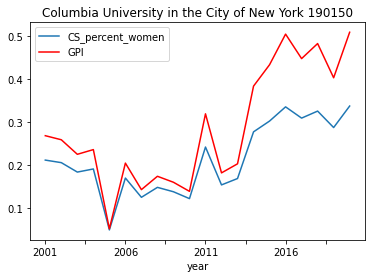

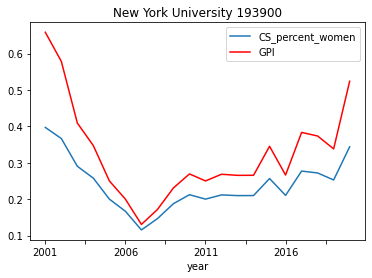

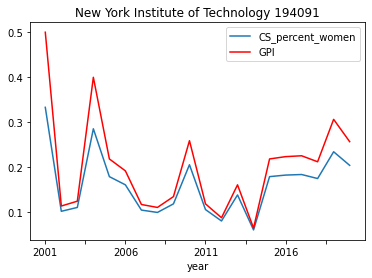

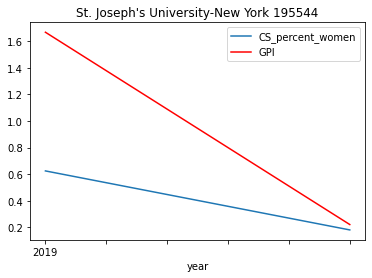

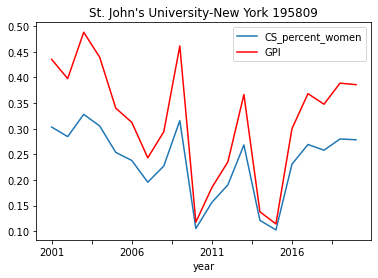

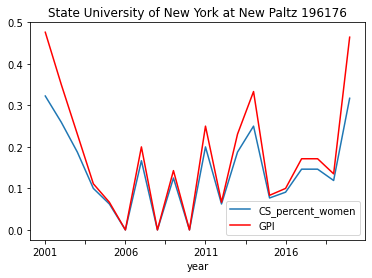

In [52]:
# Examine trends in GPI for a sample of universities 
for uni in completions_df['institution_name'].unique():
  if "New York".lower() in uni.lower():
    figure = plt.figure()
    one_uni = completions_df[completions_df['institution_name'] == uni].drop_duplicates(subset='year', keep='last')
    title_string = uni + " " + one_uni['unitid'].values[0] 
    if len(one_uni) > 1:
      ax = one_uni.plot('year', "CS_percent_women", title=title_string)
      one_uni.plot('year', 'GPI', title=title_string, color='red', ax=ax)
    else: print(title_string)
    plt.close(figure)
  

In [53]:
completions_df[completions_df['institution_name'] == "University of California-Berkeley"]

,unitid,institution_name,year,Grand_total,Grand_total_men,Grand_total_women,Asian_total,Asian_men,Asian_women,Black_or_African_American_total,Black_or_African_American_men,Black_or_African_American_women,Hispanic_or_Latino_total,Hispanic_or_Latino_men,Hispanic_or_Latino_women,White_total,White_men,White_women,GPI,CS_percent_women
910,110635,University of California-Berkeley,2001,124,91,33,71.0,46.0,25.0,0.0,0.0,0.0,2.0,2.0,0.0,32.0,31.0,1.0,0.362637,0.266129
911,110635,University of California-Berkeley,2002,115,79,36,60.0,42.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,19.0,5.0,0.455696,0.313043
912,110635,University of California-Berkeley,2003,132,95,37,77.0,54.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,18.0,4.0,0.389474,0.280303
913,110635,University of California-Berkeley,2004,141,118,23,75.0,61.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,35.0,2.0,0.194915,0.163121
914,110635,University of California-Berkeley,2005,98,87,11,46.0,38.0,8.0,0.0,0.0,0.0,4.0,3.0,1.0,31.0,29.0,2.0,0.126437,0.112245
915,110635,University of California-Berkeley,2006,104,86,18,47.0,38.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,32.0,2.0,0.209302,0.173077
916,110635,University of California-Berkeley,2007,85,75,10,41.0,35.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0,20.0,19.0,1.0,0.133333,0.117647
917,110635,University of California-Berkeley,2008,88,77,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.125000
918,110635,University of California-Berkeley,2009,79,69,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144928,0.126582
919,110635,University of California-Berkeley,2010,84,73,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150685,0.130952


## Merge Separate Dataframes into Full Dataframe

#### Merge completions and admissions

In [54]:
merged = pd.merge(left=completions_df, right=admissions_df, how='left', on=['unitid', 'year', 'institution_name'])

In [55]:
merged

,unitid,institution_name,year,Grand_total,Grand_total_men,Grand_total_women,Asian_total,Asian_men,Asian_women,Black_or_African_American_total,...,Hispanic_or_Latino_men,Hispanic_or_Latino_women,White_total,White_men,White_women,GPI,CS_percent_women,Percent_admitted,SAT_Math_25th_percentile_score,SAT_Math_75th_percentile_score
0,100654,Alabama A & M University,2001,20,10,10,0.0,0.0,0.0,16.0,...,0.0,0.0,1.0,0.0,1.0,1.000000,0.500000,75.045872,NaN,NaN
1,100654,Alabama A & M University,2002,39,21,18,0.0,0.0,0.0,32.0,...,0.0,0.0,1.0,1.0,0.0,0.857143,0.461538,55.752780,NaN,NaN
2,100654,Alabama A & M University,2003,38,20,18,0.0,0.0,0.0,33.0,...,1.0,1.0,0.0,0.0,0.0,0.900000,0.473684,44.569017,NaN,NaN
3,100654,Alabama A & M University,2004,44,21,23,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,1.095238,0.522727,47.506858,NaN,NaN
4,100654,Alabama A & M University,2005,41,21,20,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.952381,0.487805,41.988036,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,490805,Purdue University Northwest,2019,19,16,3,2.0,2.0,0.0,1.0,...,0.0,0.0,14.0,11.0,3.0,0.187500,0.157895,29.000000,490.0,580.0
14904,490805,Purdue University Northwest,2020,24,22,2,1.0,1.0,0.0,1.0,...,2.0,1.0,15.0,14.0,1.0,0.090909,0.083333,63.000000,480.0,570.0
14905,493725,University of Arkansas System eVersity,2019,10,8,2,0.0,0.0,0.0,3.0,...,0.0,0.0,7.0,7.0,0.0,0.250000,0.200000,NaN,NaN,NaN
14906,493725,University of Arkansas System eVersity,2020,16,10,6,0.0,0.0,0.0,2.0,...,0.0,0.0,13.0,10.0,3.0,0.600000,0.375000,NaN,NaN,NaN


#### Merge with institutions

In [56]:
merged = pd.merge(institutions_df, merged, on='unitid', how='inner')

In [57]:
merged

,unitid,institution name,year_x,FIPS state code,Bureau of Economic Analysis (BEA) regions,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Public, 4-year or above",institution_name,...,Hispanic_or_Latino_men,Hispanic_or_Latino_women,White_total,White_men,White_women,GPI,CS_percent_women,Percent_admitted,SAT_Math_25th_percentile_score,SAT_Math_75th_percentile_score
0,100654,Alabama A & M University,2021,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,...,0.0,0.0,1.0,0.0,1.0,1.000000,0.500000,75.045872,NaN,NaN
1,100654,Alabama A & M University,2021,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,...,0.0,0.0,1.0,1.0,0.0,0.857143,0.461538,55.752780,NaN,NaN
2,100654,Alabama A & M University,2021,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,...,1.0,1.0,0.0,0.0,0.0,0.900000,0.473684,44.569017,NaN,NaN
3,100654,Alabama A & M University,2021,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,...,0.0,0.0,0.0,0.0,0.0,1.095238,0.522727,47.506858,NaN,NaN
4,100654,Alabama A & M University,2021,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,...,0.0,0.0,0.0,0.0,0.0,0.952381,0.487805,41.988036,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,490805,Purdue University Northwest,2021,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,...,0.0,0.0,14.0,11.0,3.0,0.187500,0.157895,29.000000,490.0,580.0
14904,490805,Purdue University Northwest,2021,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,...,2.0,1.0,15.0,14.0,1.0,0.090909,0.083333,63.000000,480.0,570.0
14905,493725,University of Arkansas System eVersity,2021,Arkansas,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Baccalaureate Colleges: Arts & Sciences Focus,1,University of Arkansas System eVersity,...,0.0,0.0,7.0,7.0,0.0,0.250000,0.200000,NaN,NaN,NaN
14906,493725,University of Arkansas System eVersity,2021,Arkansas,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Baccalaureate Colleges: Arts & Sciences Focus,1,University of Arkansas System eVersity,...,0.0,0.0,13.0,10.0,3.0,0.600000,0.375000,NaN,NaN,NaN


In [58]:
merged['year_y'].value_counts()

2020    848
2019    844
2003    838
2004    826
2002    819
2018    809
2001    794
2005    784
2017    781
2016    772
2015    743
2006    741
2014    719
2013    685
2007    672
2012    665
2011    665
2008    640
2010    634
2009    629
Name: year_y, dtype: int64

In [59]:
merged = merged.drop(['institution name', 'year_x'], axis=1)

In [60]:
merged.columns

Index(['unitid', 'FIPS state code',
       'Bureau of Economic Analysis (BEA) regions',
       'Historically Black College or University', 'Tribal college',
       'Carnegie Classification 2021: Basic', 'Public, 4-year or above',
       'institution_name', 'year_y', 'Grand_total', 'Grand_total_men',
       'Grand_total_women', 'Asian_total', 'Asian_men', 'Asian_women',
       'Black_or_African_American_total', 'Black_or_African_American_men',
       'Black_or_African_American_women', 'Hispanic_or_Latino_total',
       'Hispanic_or_Latino_men', 'Hispanic_or_Latino_women', 'White_total',
       'White_men', 'White_women', 'GPI', 'CS_percent_women',
       'Percent_admitted', 'SAT_Math_25th_percentile_score',
       'SAT_Math_75th_percentile_score'],
      dtype='object')

In [61]:
merged = merged.rename(columns={'year_y': 'year'})

In [62]:
merged

,unitid,FIPS state code,Bureau of Economic Analysis (BEA) regions,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Public, 4-year or above",institution_name,year,Grand_total,...,Hispanic_or_Latino_men,Hispanic_or_Latino_women,White_total,White_men,White_women,GPI,CS_percent_women,Percent_admitted,SAT_Math_25th_percentile_score,SAT_Math_75th_percentile_score
0,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2001,20,...,0.0,0.0,1.0,0.0,1.0,1.000000,0.500000,75.045872,NaN,NaN
1,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2002,39,...,0.0,0.0,1.0,1.0,0.0,0.857143,0.461538,55.752780,NaN,NaN
2,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2003,38,...,1.0,1.0,0.0,0.0,0.0,0.900000,0.473684,44.569017,NaN,NaN
3,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2004,44,...,0.0,0.0,0.0,0.0,0.0,1.095238,0.522727,47.506858,NaN,NaN
4,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2005,41,...,0.0,0.0,0.0,0.0,0.0,0.952381,0.487805,41.988036,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2019,19,...,0.0,0.0,14.0,11.0,3.0,0.187500,0.157895,29.000000,490.0,580.0
14904,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2020,24,...,2.0,1.0,15.0,14.0,1.0,0.090909,0.083333,63.000000,480.0,570.0
14905,493725,Arkansas,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Baccalaureate Colleges: Arts & Sciences Focus,1,University of Arkansas System eVersity,2019,10,...,0.0,0.0,7.0,7.0,0.0,0.250000,0.200000,NaN,NaN,NaN
14906,493725,Arkansas,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",No,No,Baccalaureate Colleges: Arts & Sciences Focus,1,University of Arkansas System eVersity,2020,16,...,0.0,0.0,13.0,10.0,3.0,0.600000,0.375000,NaN,NaN,NaN


#### Merge with faculty

In [63]:
merged = pd.merge(merged, faculty_df, on=['unitid', 'year', 'institution_name'], how='inner')

#### Merge with enrollment

In [64]:
merged = pd.merge(merged, enrollment_df, on=['unitid', 'year', 'institution_name'], how='inner')

In [65]:
merged

,unitid,FIPS state code,Bureau of Economic Analysis (BEA) regions,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Public, 4-year or above",institution_name,year,Grand_total,...,Enrollment_Black_or_African_American_total,Enrollment_Black_or_African_American_men,Enrollment_Black_or_African_American_women,Enrollment_Hispanic_or_Latino_total,Enrollment_Hispanic_or_Latino_men,Enrollment_Hispanic_or_Latino_women,Enrollment_Asian_total,Enrollment_Asian_men,Enrollment_Asian_women,IDX_EF
0,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2001,20,...,4258.0,1986.0,2272.0,15.0,8.0,7.0,17.0,12.0,5.0,-2
1,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2002,39,...,4344.0,2082.0,2262.0,15.0,5.0,10.0,9.0,5.0,4.0,-2
2,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2003,38,...,4933.0,2340.0,2593.0,20.0,10.0,10.0,11.0,3.0,8.0,-2
3,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2004,44,...,4779.0,2280.0,2499.0,22.0,9.0,13.0,10.0,4.0,6.0,-2
4,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2005,41,...,4752.0,2252.0,2500.0,20.0,12.0,8.0,5.0,2.0,3.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2017,10,...,1032.0,359.0,673.0,1957.0,853.0,1104.0,260.0,122.0,138.0,-2
13004,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2018,17,...,916.0,322.0,594.0,1868.0,855.0,1013.0,264.0,125.0,139.0,-2
13005,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2019,19,...,919.0,313.0,606.0,1858.0,851.0,1007.0,271.0,128.0,143.0,-2
13006,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2020,24,...,863.0,264.0,599.0,1932.0,844.0,1088.0,251.0,109.0,142.0,-2


#### Finish Data Cleaning and Data Preparation

In [66]:
# only include institutions with at least 10 students studying computer science
merged = merged[merged['Grand_total'] >= 10]

In [67]:
merged = merged[~merged['Percent_admitted'].isna()]

In [68]:
merged

,unitid,FIPS state code,Bureau of Economic Analysis (BEA) regions,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Public, 4-year or above",institution_name,year,Grand_total,...,Enrollment_Black_or_African_American_total,Enrollment_Black_or_African_American_men,Enrollment_Black_or_African_American_women,Enrollment_Hispanic_or_Latino_total,Enrollment_Hispanic_or_Latino_men,Enrollment_Hispanic_or_Latino_women,Enrollment_Asian_total,Enrollment_Asian_men,Enrollment_Asian_women,IDX_EF
0,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2001,20,...,4258.0,1986.0,2272.0,15.0,8.0,7.0,17.0,12.0,5.0,-2
1,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2002,39,...,4344.0,2082.0,2262.0,15.0,5.0,10.0,9.0,5.0,4.0,-2
2,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2003,38,...,4933.0,2340.0,2593.0,20.0,10.0,10.0,11.0,3.0,8.0,-2
3,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2004,44,...,4779.0,2280.0,2499.0,22.0,9.0,13.0,10.0,4.0,6.0,-2
4,100654,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2005,41,...,4752.0,2252.0,2500.0,20.0,12.0,8.0,5.0,2.0,3.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2017,10,...,1032.0,359.0,673.0,1957.0,853.0,1104.0,260.0,122.0,138.0,-2
13004,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2018,17,...,916.0,322.0,594.0,1868.0,855.0,1013.0,264.0,125.0,139.0,-2
13005,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2019,19,...,919.0,313.0,606.0,1858.0,851.0,1007.0,271.0,128.0,143.0,-2
13006,490805,Indiana,"Great Lakes (IL, IN, MI, OH, WI)",No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2020,24,...,863.0,264.0,599.0,1932.0,844.0,1088.0,251.0,109.0,142.0,-2


In [69]:
merged = merged[~merged['SAT_Math_75th_percentile_score'].isna()]

In [70]:
merged.columns

Index(['unitid', 'FIPS state code',
       'Bureau of Economic Analysis (BEA) regions',
       'Historically Black College or University', 'Tribal college',
       'Carnegie Classification 2021: Basic', 'Public, 4-year or above',
       'institution_name', 'year', 'Grand_total', 'Grand_total_men',
       'Grand_total_women', 'Asian_total', 'Asian_men', 'Asian_women',
       'Black_or_African_American_total', 'Black_or_African_American_men',
       'Black_or_African_American_women', 'Hispanic_or_Latino_total',
       'Hispanic_or_Latino_men', 'Hispanic_or_Latino_women', 'White_total',
       'White_men', 'White_women', 'GPI', 'CS_percent_women',
       'Percent_admitted', 'SAT_Math_25th_percentile_score',
       'SAT_Math_75th_percentile_score', 'Faculty_Tenure_Status',
       'Faculty_Grand_total', 'Faculty_Grand_total_men',
       'Faculty_Grand_total_women', 'Faculty_White_total', 'Faculty_White_men',
       'Faculty_White_women', 'Faculty_Black_or_African_American_total',
       'Fa

In [71]:
region_dummies = pd.get_dummies(merged['Bureau of Economic Analysis (BEA) regions'])

In [72]:
region_dummies

,"Far West (AK, CA, HI, NV, OR, WA)","Great Lakes (IL, IN, MI, OH, WI)","Mid East (DE, DC, MD, NJ, NY, PA)","New England (CT, ME, MA, NH, RI, VT)","Plains (IA, KS, MN, MO, NE, ND, SD)","Rocky Mountains (CO, ID, MT, UT, WY)","Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","Southwest (AZ, NM, OK, TX)",U.S. Service schools
8,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
13003,0,1,0,0,0,0,0,0,0
13004,0,1,0,0,0,0,0,0,0
13005,0,1,0,0,0,0,0,0,0
13006,0,1,0,0,0,0,0,0,0


In [73]:
merged = pd.concat((merged, region_dummies), axis=1)

In [74]:
merged = merged.drop(columns=['U.S. Service schools', 'Bureau of Economic Analysis (BEA) regions'], axis=1)

In [75]:
carnegie_dummies = pd.get_dummies(merged['Carnegie Classification 2021: Basic'])

In [76]:
merged = pd.concat((merged, carnegie_dummies), axis=1)

In [77]:
merged

,unitid,FIPS state code,Historically Black College or University,Tribal college,Carnegie Classification 2021: Basic,"Public, 4-year or above",institution_name,year,Grand_total,Grand_total_men,...,Baccalaureate Colleges: Diverse Fields,Doctoral Universities: High Research Activity,Doctoral Universities: Very High Research Activity,Doctoral/Professional Universities,Master's Colleges & Universities: Larger Programs,Master's Colleges & Universities: Medium Programs,Master's Colleges & Universities: Small Programs,"Not applicable, not in Carnegie universe (not accredited or nondegree-granting)",Special Focus Four-Year: Business & Management Schools,Special Focus Four-Year: Engineering and Other Technology-Related Schools
8,100654,Alabama,Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2009,29,17,...,0,0,0,0,1,0,0,0,0,0
9,100654,Alabama,Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2011,16,8,...,0,0,0,0,1,0,0,0,0,0
10,100654,Alabama,Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2013,21,11,...,0,0,0,0,1,0,0,0,0,0
11,100654,Alabama,Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2015,27,15,...,0,0,0,0,1,0,0,0,0,0
12,100654,Alabama,Yes,No,Master's Colleges & Universities: Larger Programs,1,Alabama A & M University,2016,17,8,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,490805,Indiana,No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2017,10,8,...,0,0,0,0,1,0,0,0,0,0
13004,490805,Indiana,No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2018,17,17,...,0,0,0,0,1,0,0,0,0,0
13005,490805,Indiana,No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2019,19,16,...,0,0,0,0,1,0,0,0,0,0
13006,490805,Indiana,No,No,Master's Colleges & Universities: Larger Programs,1,Purdue University Northwest,2020,24,22,...,0,0,0,0,1,0,0,0,0,0


In [78]:
merged= merged[~merged['Faculty_GPI'].isna()]

In [79]:
merged= merged[merged['Faculty_GPI'] != np.inf]

In [80]:
merged = merged[merged['Not applicable, not in Carnegie universe (not accredited or nondegree-granting)'] == 0]

In [81]:
merged = merged.drop(columns=['Not applicable, not in Carnegie universe (not accredited or nondegree-granting)', 'Carnegie Classification 2021: Basic'], axis=1)

In [82]:
merged

,unitid,FIPS state code,Historically Black College or University,Tribal college,"Public, 4-year or above",institution_name,year,Grand_total,Grand_total_men,Grand_total_women,...,Baccalaureate Colleges: Arts & Sciences Focus,Baccalaureate Colleges: Diverse Fields,Doctoral Universities: High Research Activity,Doctoral Universities: Very High Research Activity,Doctoral/Professional Universities,Master's Colleges & Universities: Larger Programs,Master's Colleges & Universities: Medium Programs,Master's Colleges & Universities: Small Programs,Special Focus Four-Year: Business & Management Schools,Special Focus Four-Year: Engineering and Other Technology-Related Schools
8,100654,Alabama,Yes,No,1,Alabama A & M University,2009,29,17,12,...,0,0,0,0,0,1,0,0,0,0
9,100654,Alabama,Yes,No,1,Alabama A & M University,2011,16,8,8,...,0,0,0,0,0,1,0,0,0,0
10,100654,Alabama,Yes,No,1,Alabama A & M University,2013,21,11,10,...,0,0,0,0,0,1,0,0,0,0
11,100654,Alabama,Yes,No,1,Alabama A & M University,2015,27,15,12,...,0,0,0,0,0,1,0,0,0,0
12,100654,Alabama,Yes,No,1,Alabama A & M University,2016,17,8,9,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,490805,Indiana,No,No,1,Purdue University Northwest,2017,10,8,2,...,0,0,0,0,0,1,0,0,0,0
13004,490805,Indiana,No,No,1,Purdue University Northwest,2018,17,17,0,...,0,0,0,0,0,1,0,0,0,0
13005,490805,Indiana,No,No,1,Purdue University Northwest,2019,19,16,3,...,0,0,0,0,0,1,0,0,0,0
13006,490805,Indiana,No,No,1,Purdue University Northwest,2020,24,22,2,...,0,0,0,0,0,1,0,0,0,0


In [83]:
merged['year'].value_counts()

2019    582
2018    561
2020    555
2017    534
2016    511
2005    504
2015    493
2003    475
2013    453
2001    424
2007    412
2011    397
2014    386
2009    371
2012    342
2006    300
2008    293
2010    292
2004    284
2002    181
Name: year, dtype: int64

In [84]:
# eliminate all schools with few women enrolled in the entire student body
merged = merged[merged['Enrollment_Grand_total_women'] > 5]

## Save Final Dataframe

In [85]:
merged.to_csv('/content/drive/MyDrive/SML 312/Final Project Final Data/Cleaned_NCES_Data.csv') # change to desired file location

In [86]:
# Number of unique institutions in the dataset:
merged['institution_name'].value_counts()

Florida State University              20
Florida International University      20
CUNY City College                     20
University of Rhode Island            20
CUNY Hunter College                   20
                                      ..
Northwest Nazarene University          1
Marietta College                       1
The University of Tennessee-Martin     1
Tennessee Wesleyan University          1
The Pennsylvania State University      1
Name: institution_name, Length: 842, dtype: int64